<a href="https://colab.research.google.com/github/ulkster/ELVTR---AI-Finance/blob/main/Emre_Ulkucu_Lesson_10_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation

## Introduction to Customer Segmentation

Customer segmentation is a powerful technique in data science that enables businesses to categorize their customers into distinct groups based on shared characteristics. This approach is pivotal in understanding customer behavior, optimizing marketing strategies, and enhancing customer service. In this assignment, we will delve into the practical application of customer segmentation using machine learning algorithms.

- **Significance of Customer Segmentation**:
  - **Targeted Marketing**: Tailoring marketing campaigns to specific customer groups based on their purchasing behavior and preferences.
  - **Product Customization**: Developing products and services that cater to the specific needs and desires of different customer segments.
  - **Improved Customer Experience**: Delivering personalized experiences to customers, increasing satisfaction and loyalty.

The example code provided serves as a starting point for this exploration. It demonstrates the application of K-Means clustering, a popular technique in machine learning for grouping data. This algorithm partitions customers into clusters based on features like transaction amount, account balance, and transaction frequency.

- **Key Techniques and Concepts**:
  - **K-Means Clustering**: Understand and apply K-Means to segment customers.
  - **Data Standardization**: Learn the importance of scaling features for effective clustering.
  - **Cluster Visualization**: Gain skills in visualizing the clusters to extract meaningful insights.

Students are encouraged to expand upon this initial code by experimenting with different numbers of clusters, applying additional clustering techniques like Hierarchical Clustering and DBSCAN, and performing a thorough analysis of the clusters to understand their business implications. This assignment is not only a technical task but also a venture into strategic business analysis through the lens of data science.


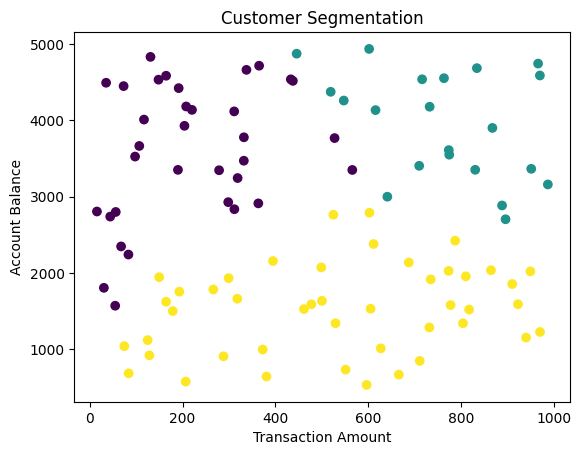

   TransactionAmount  AccountBalance  TransactionFrequency
0         219.104965     3605.076278              5.382353
1         763.371903     3941.642487              4.714286
2         534.833662     1526.159772              4.688889


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
data = pd.DataFrame({
    'TransactionAmount': np.random.uniform(10, 1000, 100),
    'AccountBalance': np.random.uniform(500, 5000, 100),
    'TransactionFrequency': np.random.poisson(5, 100)
})

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Choose the number of clusters (you may want to experiment with this)
num_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters (for two features)
plt.scatter(data['TransactionAmount'], data['AccountBalance'], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Balance')
plt.show()

# Display the cluster centers (in the standardized feature space)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=data.columns[:-1])
print(cluster_centers_df)

## Customer Segmentation Coding Assignment

### Main Assignment (100 points total)

#### 1. Data Exploration and Analysis (20 points)
- **Background**: Understanding the dataset's structure and key characteristics.
- **Tasks**:
  - Explore the distribution of features like 'Annual Income' and 'Spending Score'.
  - Identify any interesting patterns or insights from the data.
- **Points**: Detailed analysis and insights from data exploration.

#### 2. Enhanced Clustering with K-Means (20 points)
- **Background**: Application of K-Means clustering to the standardized data.
- **Tasks**:
  - Experiment with different numbers of clusters.
  - Justify the chosen number of clusters based on your analysis.
- **Points**: Creativity in experimenting with cluster numbers and justification.

**Example Code**
```python
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)
```

#### 3. Advanced Implementation of Hierarchical Clustering (20 points)
- **Background**: Applying and interpreting Hierarchical Clustering.
- **Tasks**:
  - Analyze the dendrogram to determine the optimal number of clusters.
  - Provide insights into how hierarchical clustering segments customers differently than K-Means.
- **Points**: Quality of analysis and interpretation of hierarchical clustering results.

**Example Code**
```python
Z = linkage(scaled_data, 'ward')
dendrogram(Z)
plt.show()
```

#### 4. Comprehensive Cluster Analysis (20 points)
- **Background**: Deeper evaluation of the clustering results.
- **Tasks**:
  - Compare the characteristics of the clusters from both clustering methods.
  - Calculate and interpret additional cluster quality metrics beyond silhouette score.
- **Points**: Depth of comparative analysis and use of additional metrics.

**Example Code**
```python
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
```

#### 5. Insightful Reporting and Visualization (20 points)
- **Background**: Effective communication of findings.
- **Tasks**:
  - Create insightful visualizations to represent the clustering results.
  - Write a comprehensive report discussing findings, methodologies, and potential business implications.
- **Points**: Clarity, creativity, and thoroughness in reporting and visualization.

**Example Code**
```python
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=kmeans.labels_)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
```

## Summarized Grading Rubric for Customer Segmentation Coding Assignment

### Main Assignment (100 points total)
- **1. Data Exploration and Analysis (20 points)**
- **2. Enhanced Clustering with K-Means (20 points)**
- **3. Advanced Implementation of Hierarchical Clustering (20 points)**
- **4. Comprehensive Cluster Analysis (20 points)**
- **5. Insightful Reporting and Visualization (20 points)**

### Summary Statement about the Assignment
In this assignment, we will engage in a practical application of customer segmentation, utilizing a range of machine learning techniques. We will conduct a thorough data exploration to uncover underlying patterns, apply and justify the use of K-Means clustering, explore the depth of hierarchical clustering, and provide a comprehensive analysis of the clustering results. Furthermore, we are expected to effectively communicate their findings through insightful visualizations and detailed reports, demonstrating their ability to translate technical analysis into actionable business insights. The assignment is designed not only to test technical proficiency but also to enhance our analytical thinking and their ability to draw meaningful conclusions from complex datasets.


---

### **0. Mount Drive, Import Libraries, Load Data**

In [ ]:
### For Evaluation w/o Google Drive ###

# data = pd.read_csv('Lesson 10 Mall_Customers.csv', low_memory=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Emre Ulkucu - Lesson 10 Mall_Customers.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

### **1. Data Exploration & Analysis**

In [ ]:
# Bold Function
def bold_text(text):
    bold_start = '\033[1m'
    bold_end = '\033[0m'
    return bold_start + text + bold_end

#### Check DataFrame

In [ ]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**Observations:**

* Only **four features** -> no dimensionality reduction necessary.
  * Only **two hundred rows** --> small dataset that loads quickly.

* *'CustomerID'* will be **dropped** before analysis since it's just a unique key identifier with no valuable information.

* *'Gender'* appears to two unique values (we'll confirm).  We'll **one-hot** encode this before analysis to conver from string -> numeric.

* *'Age'* & *'Annual Income'* are **numeric** with many likely uniques.  **Not sure** what the **ranges** will be yet.
  * *'Annual Income'* is in **thousands of dollars** (*k$*).

* *'Spending Score'* is also **numeric** with many uniques, *but* we know the **range** from the header: *1-100*.

* Since there is **no target variable**, this is an **unsupervised / categorization** task.

In [ ]:
# Check data types of each column
data.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


* *'Gender'* is the only **string object**, so it will be converted to **binary**.

In [ ]:
# Check for null values in the DataFrame
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


* No nulls = no imputation necessary (hooray).

In [ ]:
# prompt: uniques count

# Count unique values for each column
for col in data.columns:
    print("Unique values in " + bold_text(col) + f": {data[col].nunique()}")

Unique values in CustomerID: 200
Unique values in Gender: 2
Unique values in Age: 51
Unique values in Annual Income (k$): 64
Unique values in Spending Score (1-100): 84


**Observations:**

* Confirmed:
  * *'CustomerID'* = identifier (qty of uniques = num of rows)
  * *'Gender'* = two uniques --> will be **one-hot encoded**.

* Only **51 uniques** for *'Age'* --> 75% are repeat ages.

* **Nearly every unique** available in *'Spending Score'* is used (84/100).

#### Distributions

* Dropping *'CustomerID'*
* James's **favorite** chart for *'Gender'*
* Histograms with KDE for the others

##### **Drop** *'CustomerID'*

* In a separate drop-down section so it can be hidden.

In [ ]:
# prompt: drop customerid if it's there

# Drop 'CustomerID' column
if 'CustomerID' in data.columns:    # This check avoids the "not found in axis" KeyError during development
    data = data.drop('CustomerID', axis=1)

In [ ]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


##### James's **Favorite** Chart

* I think for this simple feature, it's ok.

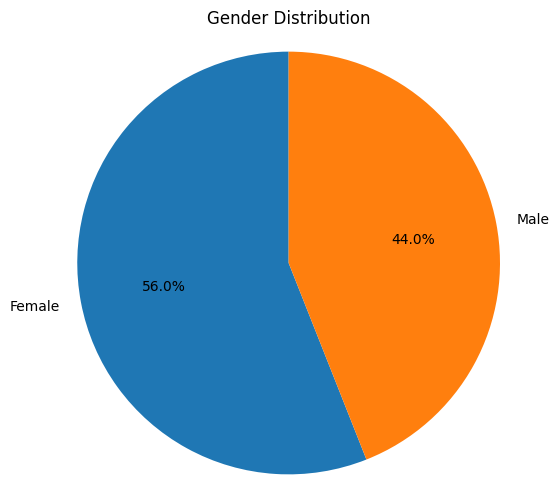

In [ ]:
# prompt: pie chart for gender

import matplotlib.pyplot as plt

# Count the occurrences of each gender
gender_counts = data['Gender'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust figure size if needed
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

* A **slight majority** to **Female**.
  * Less than the 60% Senate "cloture" rule to end a filibuster & the 67% "supermajority" in Congress to override a veto.

##### Histograms w/ KDE

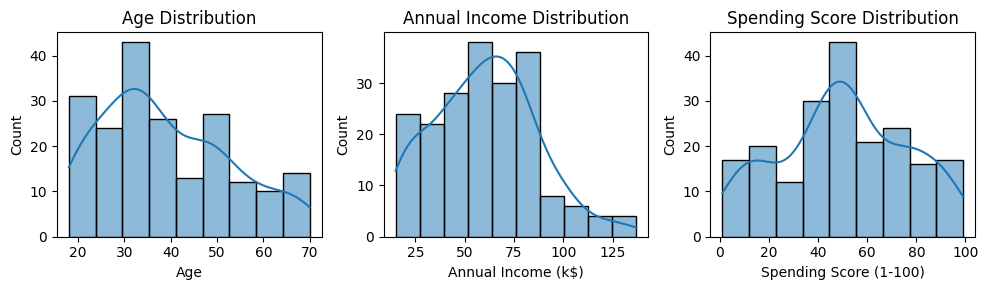

In [ ]:
# prompt: histograms with kde, graphs all on same line

import seaborn as sns

# Create histograms with KDE for 'Age', 'Annual Income', and 'Spending Score'
plt.figure(figsize=(10, 3))  # Adjust figure size as needed

# Subplot for 'Age'
plt.subplot(1, 3, 1)                  # Syntax for "subplot()": (rows, columns, index/place in line)
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')

# Subplot for 'Annual Income'
plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], kde=True)
plt.title('Annual Income Distribution')

# Subplot for 'Spending Score'
plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True)
plt.title('Spending Score Distribution')


plt.tight_layout()  # It actually spaces out a bit in this case since it makes it easier to read
plt.show()

**Observations:**

* *'Age'* & *'Annual Income'* have some **right-skew** to them.
  * **Mode** for *'Age'*: about **30-35**
    * The **least represented** age is around **59-65**
  * **Mode** for *'Annual Income*: about **50-68**
    * A close second place mode: about **75-88**
    * There is a **sharp drop-off** for the **higher incomes** above **\$87k**.
  
  * So **in general**, most of the data is for **younger people with moderate incomes**.

* The *'Spending Score'* has a generally **normal distribution**.
  * **Mode** is roughly **45-55**.
  * The **least frequent** score is roughly **21-34**.
  * Without context into how the *'Spending Score'* is calculated, we can at least state that **most people** have **around 50**, which does not sound good at first glance (if it's anything like a grade in school).
  * Out of 200 entries, **every score band** has **at least ten** people represented.
  * This normal distribution **might be a manufactured result** of using a 1-100 score.  Ex: the old-fashioned "**grading curve**" in schools used to apply a **normal distribution** to raw scores and **assign grades** accordingly.

#### Correlation Heatmap

* Running out of **curiosity** to see if there is any **collinearity**.
  * For instance, since we previously noted that the data **skews** more towards **pre-middle age** & **moderate income**, maybe *'Age'* & *'Annual Income'* have a high correlation coefficient.

In [ ]:
# prompt: encode gender binary

# Assuming 'Gender' is a column in your DataFrame 'data'
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Male' else 2)    # Assign 'Male' => 1 & 'Female' => 2

* Since I'm curious to include *'Gender'* in the **heatmap** to see if there's any **correlation** with the other features, I used values of *1* & *2* for *Male* & *Female* instead of the default *1/0* assignment to **avoid** having **0's** in the correlation **coefficient calculation**.

In [ ]:
# prompt: print percentages for gender

# Calculate gender percentages
gender_counts = data['Gender'].value_counts(normalize=True) * 100

# Print the percentages
gender_counts

,proportion
Gender,
2,56.0
1,44.0


* Just confirming that the encoding maintained the proper proportions (which it did since *Female* was assigned *2*).

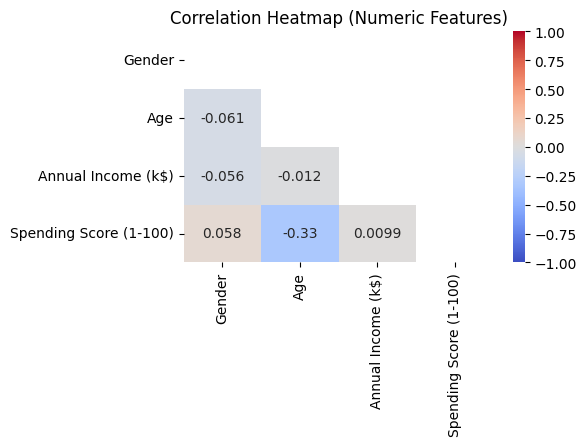

In [ ]:
# prompt: heatmap for only numeric features show bottom triangle

import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric features for the heatmap
numeric_data = data.select_dtypes(include=np.number)

# Create the correlation matrix
corr_matrix = numeric_data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(5, 3))

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

**Observations:**

* There is **almost zero** collinearity.

* The **largest coefficient** exists with *'Spending Score'* & *'Age'*, but it's still only **-0.33**, which is well below the +/- 0.8 threshhold to suggest collinearity.

### **2. Enhanced Clustering with K-Means**

* Experimenting with different cluster sizes
  * 2-D & 3-D plots
  * full dataframe (all features) & trying different feature combinations

##### **Reset** *'Data'* w/o *'Cluster'* Feature

* Rerun as needed while experimenting with *'num_clusters'* to address problems with dataframe shape
* Apply the **StandardScaler()**

In [ ]:
# prompt: drop cluster column

# Drop 'Cluster' column if it exists
if 'Cluster' in data.columns:
    data = data.drop('Cluster', axis=1)

data.sample(3)    # I prefer calling a random sample over 'head' so I can see different rows

,Gender,Age,Annual Income (k$),Spending Score (1-100)
157,2,30,78,78
88,2,34,58,60
89,2,50,58,46


In [ ]:
# Standardize the data
scaler = StandardScaler()                 # Centers data around 0 w/ std = 1 & range = -3, 3 (since 99.7% is within three standard deviations)
scaled_data = scaler.fit_transform(data)

* I think I realized that you don't actually have to reset the dataframe when trying different numbers of clusters as long as you don't rerun the scaler *after* changing the quantity.
  * It seems that if you do rerun the scaler, *then* you have to reset the dataframe before continuing the clustering experiments.

#### A. Using All **Three** Features (*'Age'*, *Income*, & *Score*,  separate *'Gender'* for 3-D)

1. (i) All on a single **2-D** plot
    * Including *'Gender'* would now make **four features**, which the model cannot handle in two dimensions.  Instead, that will be addressed when plotting 3-D graphs.
2. (ii) Separated into **two 3-D** plots (one for each *'Gender'*)

##### (i) All on the same **2-D** Plot

* Using **three** features on a 2-D x/y plane makes the **third listed feature** affect the **size** of the dots.

* After showing different setups for the 2-D plot, I will later **remove the third feature** since the dot sizes are not all that valuable & I want to focus on analyzing the result metrics.



###### a. *'Age'* vs. *Income*

In [ ]:
# Apply KMeans clustering
num_clusters = 3  # This can be adjusted based on experimentation
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

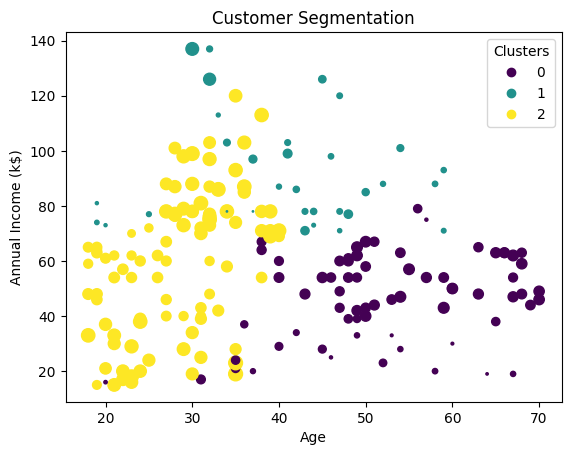

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.605634,52.169014,46.676056,39.295775
1,1.371429,40.228571,91.342857,20.628571
2,1.595745,28.276596,59.585106,69.446809


In [ ]:
# Visualize the clusters (AGE vs. INCOME)

# Scaled_data is for the clustering algorithm, but we display the original units
scatter = plt.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')

# Set up the plot
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

# Get unique cluster labels and create a legend
handles, labels = scatter.legend_elements()
legend = plt.legend(handles, labels, title="Clusters")

plt.show()

# Calculate cluster centers in the original data scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Display the cluster centers (in the standardized feature space)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=data.columns[:-1])
cluster_centers_df

**Observations:**

* *Roughly* a **triangular blob**.  I'll be *loosely* comparing each plot to a shape.

* After experimenting with multiple quantities of clusters (as many as thirty), **three** appears to be the optimal number (if we include *'Age'*).

* There are also multiple sizes for dots.  
  1. I first thought it might just be for *'Gender'* (one size for each), but I realized that there are more than just big & small dots... it looks like three or four sizes.
  2. With some research, it could have to do with **density** (reasonable to see **larger** dots as **more dense**) since they do not appear to be sparse or outliers (which are other potential reasons for larger dots in other plots).
  3. But then with some other experimentation I realized that since I'm plotting three variables on a 2-D graph (without a third axis), the dot size is actually for the **third variable**, in this case *Score*.  That's why there are more than two sizes: they grow with the *score* value. This will be addressed with more graphs below, including 3-D and other plots with only two of the features.

Interpreting the **cluster centers**:
  * Cluster **0 (purple)**:
    * largest proportion of **female** (**1.61** is the closest to 2, which is the value for **female**)
    * **oldest** group (average *'age'* = **~52 yrs**)
    * **lowest income** (about **\$47k**)
    * a *Spending Score* close to the **middle of the pack** (around **39**).  I'm still not sure how this is calculated or what it means.  Two possible interpretations could be A) how much they're spending or B) how "reasonable" their spending habits are.  These are quite different interpretations, and it's also not even clear where a "better" score is (ex: low = too thrifty, high = too lavish, mid = just right like Goldilocks)... if there is even a "better" area of the score chart.
  
  * Cluster **1 (turquoise)**:
    * skews the **most towards male** (lowest *'Gender'* value of **1.37**)
    * **middle of the road** for *'Age'* (**~40 yrs**)
    * the **highest income ~\$91k**
    * **lowest spending score** of around **21**
  
  * Cluster **2 (yellow)**:
    * just **slightly lower female proportion** than **Cluster 0** (value **~1.5957**)
    * **youngest** group (**~28 yrs**)
    * the **middle income** (**~\$60k**)
    * **highest spending score** (around **69**)

###### b. *'Age'* vs. *Score*

In [ ]:
# Apply KMeans clustering
num_clusters = 3  # This can be adjusted based on experimentation
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

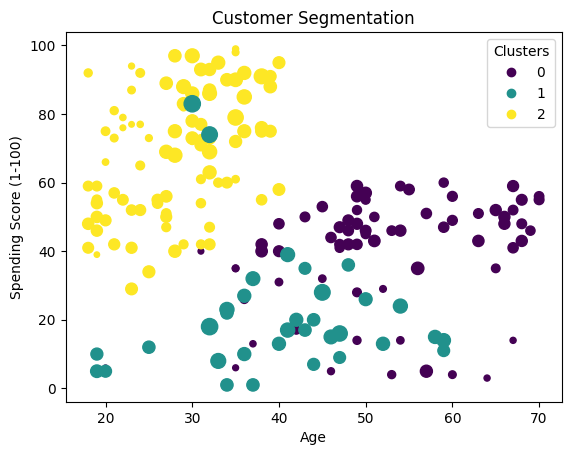

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.605634,52.169014,46.676056,39.295775
1,1.371429,40.228571,91.342857,20.628571
2,1.595745,28.276596,59.585106,69.446809


In [ ]:
# Visualize the clusters (AGE vs. SCORE)
scatter = plt.scatter(data['Age'], data['Spending Score (1-100)'], data['Annual Income (k$)'], c=data['Cluster'], cmap='viridis')

# Set up the plot
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

# Get unique cluster labels and create a legend
handles, labels = scatter.legend_elements()
legend = plt.legend(handles, labels, title="Clusters")

plt.show()

# Calculate cluster centers in the original data scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Display the cluster centers (in the standardized feature space)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=data.columns[:-1])
cluster_centers_df

**Observations:**

* *Roughly* an **L-shape**, or a **dying Pac-Man**, or the **profile of a baby stroller**.

* Since this display also seems to have **three distinct clusters**, they are the same as before, just with a different pair of axes graphed.

* When you first look at these 2-D graphs and see overlap, it sometimes seems like some dots should clearly be part of another cluster (ex: the two big turquoise dots right in middle of the yellow cluster).  Possible **reasons** for **overlap** include:
    * **data ambiguity**: some points could share features with multiple clusters, so the model struggles to group them definitively.

    * **cluster shape**: if the groups have irregular shapes that the algorithm doesn't expect (ex: K-Means expects spherical).
      * But while the clusters might have irregular shapes difficult for the model to discover, our eyes seem to be better able to group them.  This is an evolutionary trait computers have not developed... yet.
    
    * **density/proximity**: especially with purple & turquoise, they are pretty close to each other... so they could be assigned to either group.
      * However, those two turquoise dots in the yellow group really stand out since they're so far from the rest of the turquoise group.
    
    * **algorithm limitations:** we're just using k-means here, which relies on distance & could lead to overlap (makes sense for purple & turquoise, not so much for turquoise in yellow).  Later, we will apply DBSCAN to handle overlapping clusters more effectively.

###### c. *Income* vs. *Score*

In [ ]:
# Apply KMeans clustering
num_clusters = 5  # This can be adjusted based on experimentation
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

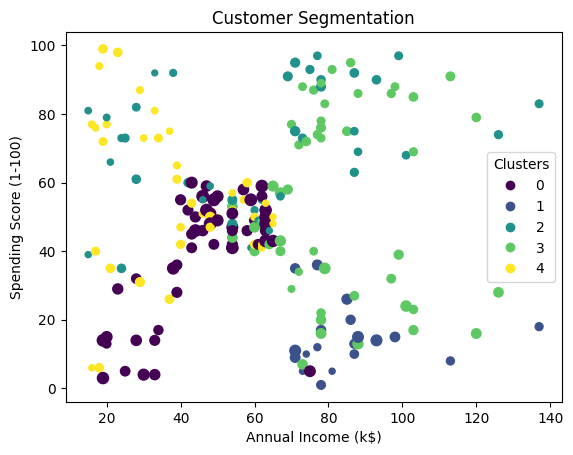

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.490196,56.470588,46.098039,39.313725
1,1.000000,39.500000,85.150000,14.050000
2,1.000000,28.690476,60.904762,70.238095
3,2.000000,37.897959,82.122449,54.448980
4,2.000000,27.315789,38.842105,56.210526


In [ ]:
# Visualize the clusters (for two features)

# Scaled_data is for the clustering algorithm, but we display the original units
scatter = plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], data['Age'], c=data['Cluster'], cmap='viridis')

# Set up the plot
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Get unique cluster labels and create a legend
handles, labels = scatter.legend_elements()
legend = plt.legend(handles, labels, title="Clusters")

plt.show()

# Calculate cluster centers in the original data scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Display the cluster centers (in the standardized feature space)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=data.columns[:-1])
cluster_centers_df

**Observations**:

* This graph looks **quite different** from the previous two.  In particular, it looks like **an 'X'**.

* Even though there seem to be **five clear clusters** upon inspection, I could not manually find a good value for the number of clusters that successfully reflects that.
  * There is **significant overlap** regardless of which value I chose.
  * I'll leave it as **num_clusters=5** for now then perform further analysis later specifically on this pairing to find the most effective grouping (ex: **Elbow** & **Silhouette** methods).

##### (ii) Two **3-D** Plots (one for each *'Gender'*)

In [ ]:
# prompt: 3d cluster for MALE ('Gender' = 1)

# Experimenting if a different amount of clusters works better for 3-D

num_clusters = 11  # This can be adjusted based on experimentation
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)


# Plot
import plotly.express as px

fig = px.scatter_3d(data[data['Gender'] == 1], x='Age', y='Annual Income (k$)',
                    z='Spending Score (1-100)', color='Cluster',)
fig.update_layout(title_text="MALE Segmentation")
fig.show()

# Display the cluster centers (in the standardized feature space)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=data.columns[:-1])
cluster_centers_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,58.350000,54.300000,49.150000
1,1.0,24.136364,41.454545,62.681818
2,2.0,41.538462,26.538462,20.692308
3,2.0,32.190476,86.047619,81.666667
4,2.0,54.153846,54.230769,48.961538
5,1.0,39.500000,85.150000,14.050000
6,2.0,27.960000,57.360000,47.120000
7,1.0,33.277778,87.111111,82.666667
8,2.0,25.461538,25.692308,80.538462
9,2.0,43.785714,93.285714,20.642857


**Observations:**

* For *'num_clusters'*, using values of **8, 9, 10** seem to all yield the **same graph** (ex: the *Cluster* legend on the side remains unchanged with a max of *7*).  [Same thing happens with setting it to 13 or 14... interesting.]
  * Using any of the above cluster values, it **visually** seems that there are **four groups** & **one solitary dot** around **35 yrs** with **\$20k**.

* Using a value of **11** for *'num_clusters'* seemed to yield the best results (**distinct** groups AND **more than four** members).
  * Even though we assigned eleven clusters per the function, it **visually** appears that there are **five main groups**.  I tried testing this with adjusting the clusters value, but the gradient of the coloring scheme made it difficult to see those grouops, so I settled on 11.  I would describe those groups (with some leway) as such:
    * **yellow** = 30-70 yrs, lower income (< \$40k), lower spending score (< 40)

    * **pink** = 20-60 yrs, mostly between \$60k-\$80k (two exceptions @ \$113k & \$137k), similarly lower spending score (< 40)
    
    * **blue** = tightly packed, 40-70 yrs, \$40k-\$60k, moderate spending score (40-60)
    
    * **purple** = 20-40 yrs, \$20k-\$70k (two exceptions @ \$15k), higher spending score (60-100 with one exception @ 39)
    
    * **orange** = 30-40 yrs, \$60k-\$100k (two exceptions @ \$126k & \$137k), higher spending score (60-100)

In [ ]:
# prompt: 3d cluster for FEMALE ('Gender' = 2)

# Experimenting if a different amount of clusters works better for 3-D

num_clusters = 10  # This can be adjusted based on experimentation
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)


import plotly.express as px

fig = px.scatter_3d(data[data['Gender'] == 2], x='Age', y='Annual Income (k$)',
                    z='Spending Score (1-100)', color='Cluster',)
fig.update_layout(title_text="FEMALE Segmentation")
fig.show()

# Display the cluster centers (in the standardized feature space)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=data.columns[:-1])
cluster_centers_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.000000,58.846154,48.692308,39.846154
1,1.000000,25.250000,41.250000,60.916667
2,1.928571,41.214286,26.071429,20.142857
3,2.000000,32.190476,86.047619,81.666667
4,2.000000,54.153846,54.230769,48.961538
5,1.000000,38.473684,85.894737,14.210526
6,2.000000,27.960000,57.360000,47.120000
7,1.000000,33.277778,87.111111,82.666667
8,2.000000,25.461538,25.692308,80.538462
9,2.000000,43.785714,93.285714,20.642857


**Observations:**

* Here, **num_clusters=10** yielded the best results visually.
  * Similar to the male graph, I see a handful of groups (**six main clusters**) even with ten clusters assigned with the general descriptions:
    * **yellow** = 30-60 yrs, mostly \$70k-\$105k (two exceptions @ \$120k & \$126k), lower spending score (< 40)

    * **pink** = tightest group 20-40 yrs (two teeanger exceptions @ 18 & 19 yrs), lower income ~\$15k-\$40k, spending score ~30-60
    
    * **blue** = 20-60 yrs, \$40k-\$60k, low spending score < 40

    * **lavender (lighter)** = 40-70 yrs, \$40k-\$80k, mostly 40-60 spending score (two exceptions @ 35)

    * **darker purple** = 25-40 yrs, lower income \$15k-\$40k, higher spending score > 75
    
    * **orange** = 20-35 yrs, \$60k-\$100k (two exceptions @ \$126k & \$137k), higher spending score > 65

### **3. Hierarchical Clustering**

#### Update *'scaled_data'* with only *Income* & *Score*

* We could visually identify optimal cluster quantity with the other setups, but the "X" graph with these two features did **not** have a successful **k-means** clustering.  So we try other analysis methods.

In [ ]:
# Select relevant features for clustering
selected_features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

selected_features.sample(3)

,Annual Income (k$),Spending Score (1-100)
186,101,24
57,44,46
35,33,81


In [ ]:
scaled_data = scaler.fit_transform(selected_features)

#### Apply Dendrogram with *'selected_features'*

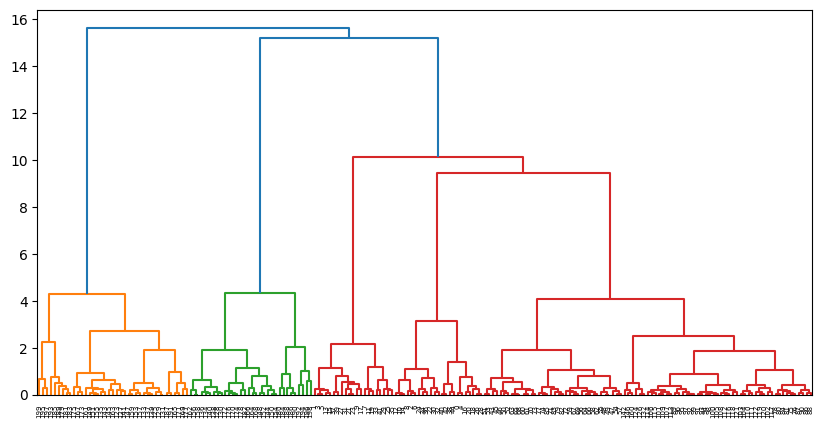

In [ ]:
# Prepare for Hierarchical Clustering
Z = linkage(scaled_data, 'ward')
dendrogram(Z)

# Get the current figure
fig = plt.gcf()

# Set the figsize to make it wider
fig.set_size_inches(10, 5)

plt.show()

**Observations:**

* It looks like the **longest vertical line** is the **far-left blue** line that goes from about **15.9 --> 4.1**.

* And when you start moving a horizontal line down, the **vertical distances** all get **much shorter** when the orange & green start **around 4.1**.
  * As a result, the horizontal line would cross **five vertical lines** (two blue & three red).
  * This **matches** what we saw in the **X-shaped scatter plot**.

* The dendrogram uses line lengths/distances to communicate valuable information:
  * **Vertical length** = how far apart clusts were before merging, so longer branches mean that the clusters were more distinct.
    * Each vertical line is a cluster.
  * **Horizontal lines** = the height where they are drawn (which the y-axis measures as dissimilarity/difference) shows at what point/distance two clusters were merged.
    * Each branching point (*node*) shows the merging of two clusters.
    * These lengths are purely to show connection of clusters and **do not** relate to the **distance** of those clusters.

* Some key **differences** from a **K-Means**:
  * **Dendrograms** are hierarchical, so the clusters are **ranked on differences** (the **y-axis**), and you determine the **number of clusters** by **looking** at the chart or other analysis.
    * Whereas, in a **k-means**, you **predefine** the cluster quantity and **dividing** the data into groups that you can draw conclusions from based on where those groups show up on scatterplots (2-D or 3-D).
  
  * Speaking of the visual representation, we have **tree-like dendrograms** vs. **color-coded K-Means dot clusters**.

  * And **K-Means** is **computationally efficient** compared to **dendrograms** (especially for large datasets).

---

## Introduction to Cluster Evaluation Techniques

In the realm of unsupervised machine learning, determining the optimal number of clusters is a pivotal decision that can significantly impact the outcomes of your model. Cluster evaluation techniques are essential tools that provide guidance in this decision-making process. Two of the most widely recognized methods for evaluating clustering results are the Elbow Method and the Silhouette Score.

#### Elbow Method
- **Explanation**: The Elbow Method is a heuristic used in determining the number of clusters in a data set. The approach involves plotting the explained variance as a function of the number of clusters, and picking the point where the increase in variance explained by adding another cluster is not significant anymore. This point is known as the 'elbow', where the graph bends.
- **Interpretation**: In the Elbow Method, one should look for a change in the gradient of the line plot; a sharp change like an elbow suggests the optimal number of clusters. The idea is that adding more clusters beyond this number does not provide much better modeling of the data.

#### Silhouette Score
- **Explanation**: The Silhouette Score is a metric used to calculate the goodness of a clustering technique. It measures the distance between points within a cluster and the distance to points in the next nearest cluster. The score ranges from -1 to +1, where a high value indicates that the points are well clustered.
- **Interpretation**: A Silhouette Score close to +1 indicates that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

Both methods provide different lenses through which to view the clustering results and can be used in conjunction to make a more informed decision. The Elbow Method gives us an insight into the variance within each cluster, whereas the Silhouette Score provides a measure of how similar an object is to its own cluster compared to others. The optimal number of clusters is often the one that balances between the two measures, subject to the specific context and use case of the analysis.


---

### **4. Cluster Analysis**

* Elbow Method
* Silhouette

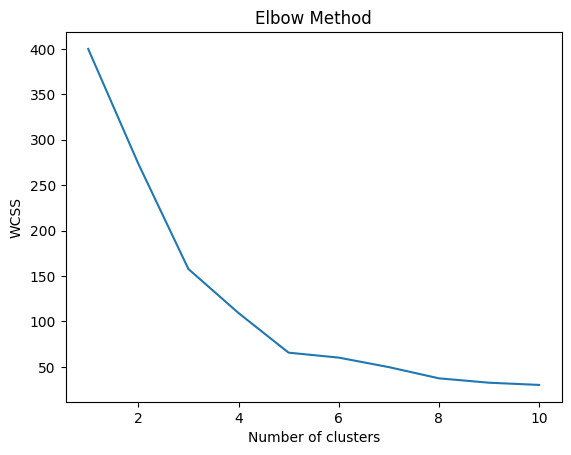

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


**Observations:**

* The **first turn** is at **3**, which implies the biggest difference in clusters.

* But the **sharpest turn** (or "elbow") at **5**, which confirms the above dendrogram  & "X-shaped" scatter plot interpretation of identifying **five optimal clusters.**

* Past five, there is **not much change** in the elbow curve graph, so there is **little difference** in the increased amount of **clusters**, meaning they are **unecessary.**

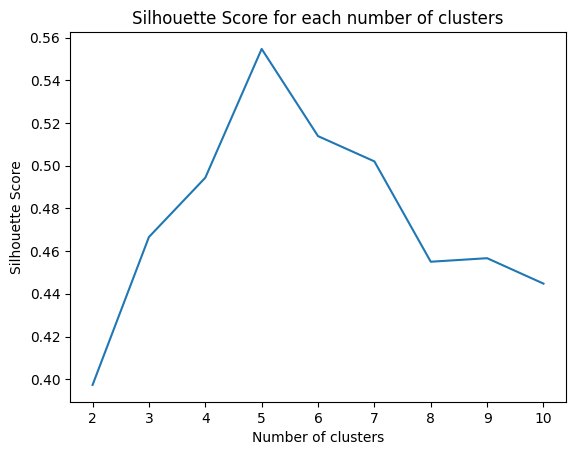

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score for each number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


**Observations:**

* Again, we see that we reach a **peak** at **five clusters**.  We interpret this as the **optimal amount.**

* The actual **score of ~0.56** at the peak is categorized as a "*reasonable structure*" for the clusters.
  * While **not a proportion**, the score still has a max of +1 (min of -1) and can be considered a **"grade"** with a calculation based on the **ratio** between the **average distance** to points in the **same cluster** & average distance to points in the **nearest neighboring cluster** (separation).

  * So a **higher** silhouette **score** means that **same-cluster** points are **closer** to each other than **neighboring cluster** points.

In [ ]:
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
silhouette_avg

0.44475993501732874

**Observations:**

* This tells that **on average**, the cluster structure is **weak** and may be **artificial.**

* So acheiving the **peak score** of **0.56** is a relative success.

### **5. Insights**

* Import *'fcluster'* function to go from the **tree-like dendrogram** --> **flat list** of clusters.

* Use **five clusters** as identified to be the **optimal** amount from the above alasyes.

* Apply the labels

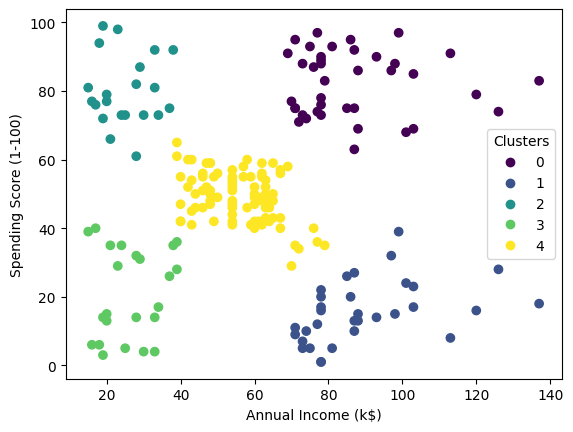

In [ ]:
# Importing the "fcluster" function to flatten the dendrogram & assign cluster labels
from scipy.cluster.hierarchy import fcluster

# Using 5 clusters
cluster_labels = fcluster(Z, 5, criterion='maxclust')

# Update scatter plot
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=cluster_labels)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Get unique cluster labels and create a legend
handles, labels = scatter.legend_elements()
legend = plt.legend(handles, labels, title="Clusters")

plt.show()

**Observations:**

* Beautiful.  The resulting cluster labeling matches the color-codes to what is visually apparent and the previous cluster analyses.
  * There's **no overlap** in the scatterplot (**unlike K-means**).

* Applying the *'scaled_data'* to strictly the *Income* & *Score* and using a **hierarchical clustering method** (the **dendrogram**) resulted in the proper labeling.

In [ ]:
# Calculate cluster centers for hierarchical clusters
cluster_centers_hierarchical = []
for cluster_num in range(1, 6):  # Iterate through clusters
    cluster_data = data[cluster_labels == cluster_num]
    center = cluster_data[['Annual Income (k$)', 'Spending Score (1-100)']].mean() # Calculate mean for income and score
    cluster_centers_hierarchical.append(center)

cluster_centers_hierarchical_df = pd.DataFrame(cluster_centers_hierarchical, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
cluster_centers_hierarchical_df

,Annual Income (k$),Spending Score (1-100)
0,86.538462,82.128205
1,89.406250,15.593750
2,25.095238,80.047619
3,26.304348,20.913043
4,55.811765,49.129412


**Observations:**

* **Purple (0)** = upper-right -> higher income, **highest** spending score (82)

* **Dark Blue (1)** = lower-right -> **highest** income (\$89k), **lowest** spending score (15.6)

* **Teal (2)** = upper-left -> **lowest** income (\$25k), high spending score

* **Light Green (3)** = lower-left -> low income & spending score

* **Yellow (4)** = middle -> mid-income & spending score

==========================================

**Implications:**

* Although I did **not** perform **elbow or silhouette** for the **3-D K-Means scatter** plots (which included **all features**), they also had **5** or **6 clusters** visually obvious (**male** or **female**, respectively).
  * So after multiple visualizations and analyses, there is a general consensus of **five optimal clusters.**
  * I could apply those analysis methods to those other plots that use all features to see if that clustering amount holds up.

* However, the **silhouette score** here only achieves **"reasonable"** status, so other methods (like DBSCAN) would be a worthwhile investigation to see if we can have better results.

* It's still **imperative** to find out what *Spending Score* means in order to determine how to interpret the results for each cluster.
  * This would allow us to make more **concrete** business conclusions (i.e. is a higher score good like a rating or bad like a percentage of income being spent?).

  * Then we could also taylor possible products (ex: credit cards, investment/loan opportunities, debt support, etc.) to particular hierarchical groups with a better understanding of the score.

---

## Extra Credit Assignment (50 points total)

#### Advanced Clustering Techniques (20 points)
- **DBSCAN Clustering**:
  - Implement DBSCAN and compare its segmentation with K-Means and Hierarchical clustering.
  - Analyze the clusters formed by DBSCAN for any unique characteristics.
- **Points**: Quality of implementation and comparative analysis.

#### Dimensionality Reduction Technique (15 points)
- **Principal Component Analysis (PCA)**:
  - Apply PCA to the data and visualize the results.
  - Discuss how dimensionality reduction impacts the clustering results and its potential use in simplifying complex datasets.
- **Points**: Effectiveness of PCA implementation and analysis of its impact.

#### Real-world Application Scenario (15 points)
- **Scenario Development and Justification**:
  - Develop a detailed business scenario utilizing the clustered data.
  - Justify how the chosen segmentation and dimensionality reduction techniques can provide strategic insights in this scenario.
- **Points**: Creativity and practicality in scenario development and justification of techniques.

---

### **BONUS WORK**

In [ ]:
### For Evaluation w/o Google Drive ###

# data = pd.read_csv('Lesson 10 Mall_Customers.csv', low_memory=False)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

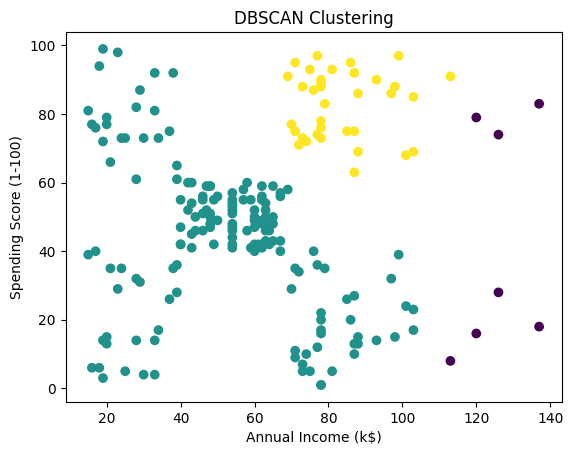

-------------------------------------------------- 

Cluster -1: 7 points
Cluster 0: 157 points
Cluster 1: 36 points

 -------------------------------------------------- 

Cluster Centers: 

    Annual Income (k$)  Spending Score (1-100)
 0           52.490446               43.101911
 1           83.111111               82.416667
-1          125.571429               43.714286

 -------------------------------------------------- 

DBSCAN Silhouette Score: 0.3566017629129311
KMeans Silhouette Score: 0.44475993501732874
Hierarchical Silhouette Score: 0.5538089226688662 



In [ ]:
# Experiment with different epsilon and min_samples values
# Current setup: dbscan = DBSCAN(eps=1, min_samples=5)
dbscan = DBSCAN(eps=0.5, min_samples=3)  # Reduced eps, lowered min_samples
clusters_dbscan = dbscan.fit_predict(scaled_data)

# Add the DBSCAN cluster labels to the DataFrame
data['DBSCAN_Cluster'] = clusters_dbscan

# Visualize the DBSCAN clusters
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=clusters_dbscan)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering')
plt.show()


print("-" * 50, "\n")


# Analyze the unique characteristics of DBSCAN clusters (e.g., number of points in each cluster, cluster density)
unique_clusters_dbscan = np.unique(clusters_dbscan)
for cluster in unique_clusters_dbscan:
    print(f"Cluster {cluster}: {np.sum(clusters_dbscan == cluster)} points")


print("\n", "-" * 50, "\n")


# Calculate cluster centers for DBSCAN clusters
from collections import defaultdict

cluster_centers_dbscan = defaultdict(list)
for i in range(len(data)):
    cluster_centers_dbscan[clusters_dbscan[i]].append(data.iloc[i][['Annual Income (k$)', 'Spending Score (1-100)']].values)

cluster_centers_dbscan_means = {}
for cluster, points in cluster_centers_dbscan.items():
    if points:
        cluster_centers_dbscan_means[cluster] = np.mean(points, axis=0)

cluster_centers_dbscan_df = pd.DataFrame.from_dict(cluster_centers_dbscan_means, orient='index', columns=['Annual Income (k$)', 'Spending Score (1-100)'])
print(bold_text("Cluster Centers: \n"))
print(cluster_centers_dbscan_df)

print("\n", "-" * 50, "\n")


# Example comparison: Silhouette scores
kmeans_silhouette = silhouette_score(scaled_data, kmeans.labels_)
hierarchical_silhouette = silhouette_score(scaled_data, cluster_labels)

# Calculate silhouette score only if there are more than one cluster
if len(unique_clusters_dbscan) > 1:
    dbscan_silhouette = silhouette_score(scaled_data, clusters_dbscan)
    print(bold_text("DBSCAN Silhouette Score: ") + f"{dbscan_silhouette}")
else:
    print("DBSCAN formed only " + bold_text("one") + "cluster. Silhouette score cannot be calculated.")

print(bold_text("KMeans Silhouette Score: ") + f"{kmeans_silhouette}")
print(bold_text("Hierarchical Silhouette Score: ") + f"{hierarchical_silhouette} \n")

**Observations:**

* I couldn't get the cluster labeling to work on the graph with a color-coded legend like before (it was showing more clusters than this graph had, likely due to some variable naming issue)...
  * *However*, since the **Cluster** list shows the amount of points, it's easy to identify each cluster (with brief descriptions based on the centers):
    * **-1** = **purple** = highest income (\$126k), lower spending score (43.7), more spread out, represents noise (outliers).
      * Makes sense that these are the **outliers** since they're separated from the rest of the data.

    * **0** = **turquoise** = majority of the data (~75% of the data 157/200), lower income (\$52k), lowest spending score (43.1), has four visually separateable groups

    * **1** = **yellow** = the upper-right section, upper income (\$83k), highest spending score (82.4)

* DBSCAN achieved the **lowest silhouette score** (0.36 is the lowest), which makes sense when you look at the "X-graph" and see only three clusters.
  * **Hierachical** was the **best** overall, and it correlates to the visualization since it was showed the **clearest** clustes with **appropriate color-coding**.
  
  * Below is a generated silhouette graph for DBSCAN to see if more clusters would help the score.

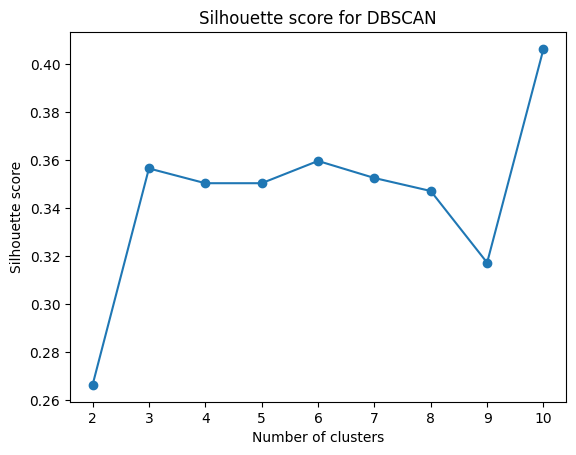

In [ ]:
# prompt: silhouette score graph for dbscan

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np

# Assuming 'scaled_data' and 'kmeans' are defined from the previous code
# and 'dbscan' is the trained DBSCAN model

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

silhouette_scores_dbscan = []
for n_clusters in range_n_clusters:
    dbscan = DBSCAN(eps=0.5, min_samples=n_clusters) # Vary min_samples
    cluster_labels = dbscan.fit_predict(scaled_data)

    # Calculate silhouette score only if there's more than one cluster
    if len(np.unique(cluster_labels)) > 1:
      silhouette_avg = silhouette_score(scaled_data, cluster_labels)
      silhouette_scores_dbscan.append(silhouette_avg)
    else:
      silhouette_scores_dbscan.append(0) # Or handle it differently

plt.plot(range_n_clusters, silhouette_scores_dbscan, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.title("Silhouette score for DBSCAN")
plt.show()

**Observations:**

* We can see that **ten** clusters would achieve the best score (I also tried it past 10, but the score decreased.

* It's also interesting to me that past six clusters, the score decreases then the big jump when you get to ten.

**Furthermore:**

* I suppose removing *'Gender'* & *'Age'* before continuing with more complex analysis technically qualifies as "dimensionality reduction", but it's not like we had dozens of features at the beginning and were trying to find which were actually relevant.

* Plus, I did not explicitly run a silhouette score chart on other groupings of features (i.e. including the aforementioned two features that were dropped).
  * While the original **2-D** graphs show some **overlap** and would **likely** have **"not great" scores**, I think the **3-D** graphs (separated for *'Gender'*) **might** yield **better** results based on their visual clusters.

* As for **real-world implications**, it is *imperative* that the *'Spending_Score'* be explained & understood properly.  The context would certainly affect how a business would interpret these model results and apply them to their practices.
  * If it is a **credit/loan-related** scenario, there might be **legal restrictions** about using things like *'Age'* & *'Gender'*.

  * But if it is a **marketing/advertising** scenario, those features may be **valuable** to **incorporate** in future models to see how they affect the clustering metrics.

* In any case, at the moment, **Hierarchical Clustering** was the **best performing** method.